In [168]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load data here(Encoding is important because Indian names having special character)
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [169]:
# only remove rows where rating is missing
df.dropna(subset=['Rating'], inplace=True)

# remove ' min' from duration and make number
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float)

# comma from votes ',' remove and make number
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

# brackets from year '( )' remove
df['Year'] = df['Year'].str.strip('()').astype(float)

# those value are left fill it wisely
df['Duration'].fillna(df['Duration'].median(), inplace=True)
df['Votes'].fillna(df['Votes'].median(), inplace=True)

print(df.isnull().sum()) # Check it get clean or not

Name          0
Year          0
Duration      0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64


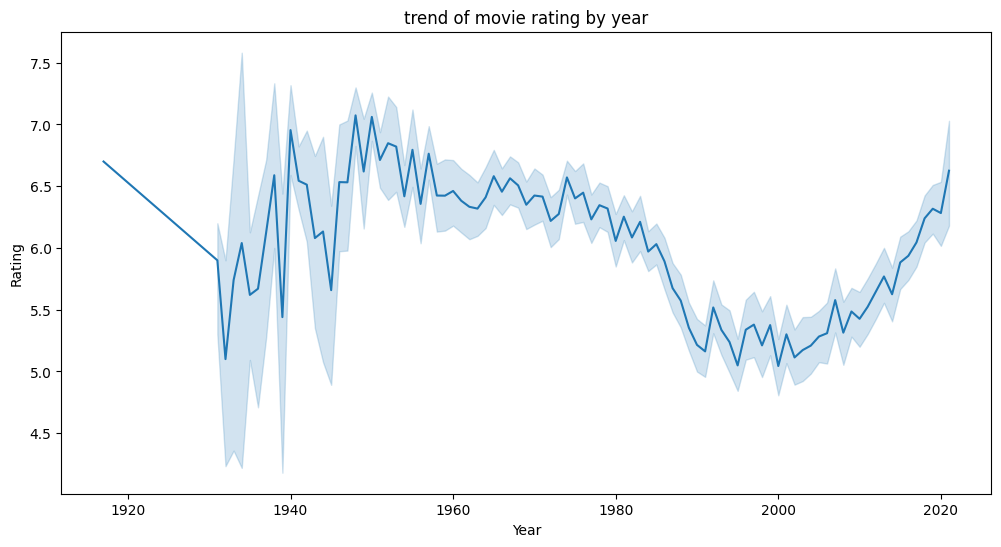

In [170]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Rating')
plt.title("trend of movie rating by year")
plt.show()

In [171]:
import warnings
warnings.filterwarnings('ignore') # by using of this code all waste value get remove

# --- STEP 4: Feature Engineering (Clean Way) ---
# we can predict the value of  Genre, Director and Actor
df['Genre_mean_rating'] = df.groupby('Genre')['Rating'].transform('mean')
df['Director_mean_rating'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor1_mean_rating'] = df.groupby('Actor 1')['Rating'].transform('mean')

# new rules  (without inplace=True )
df['Genre_mean_rating'] = df['Genre_mean_rating'].fillna(df['Rating'].mean())
df['Director_mean_rating'] = df['Director_mean_rating'].fillna(df['Rating'].mean())
df['Actor1_mean_rating'] = df['Actor1_mean_rating'].fillna(df['Rating'].mean())

# --- STEP 5: Features Selection ---
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_mean_rating', 'Actor1_mean_rating']
X = df[features]
y = df['Rating']

# --- STEP 6: Splitting & Model Training ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Data split 80-20 ratio mein
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor (Please note, this is a Regressor, not a Classifier.")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("-" * 30)
print("SUCCESS: Model Training Complete!")
print(f"Training Data: {len(X_train)} movies")
print(f"Testing Data: {len(X_test)} movies")
print("-" * 30)

------------------------------
SUCCESS: Model Training Complete!
Training Data: 6335 movies
Testing Data: 1584 movies
------------------------------


In [172]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [173]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)

print(f"Model R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Model R2 Score: 0.7342846976645505
Mean Squared Error: 0.4940033131313131


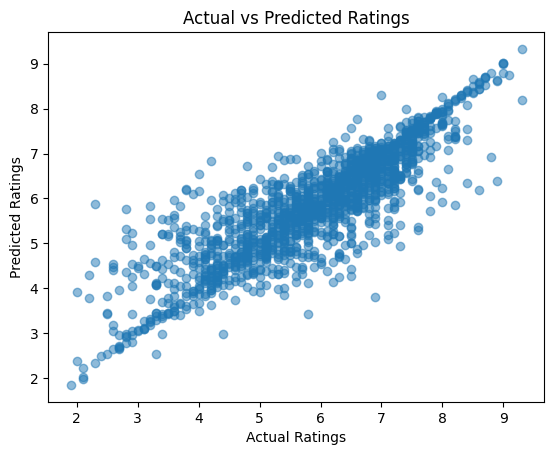

In [174]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

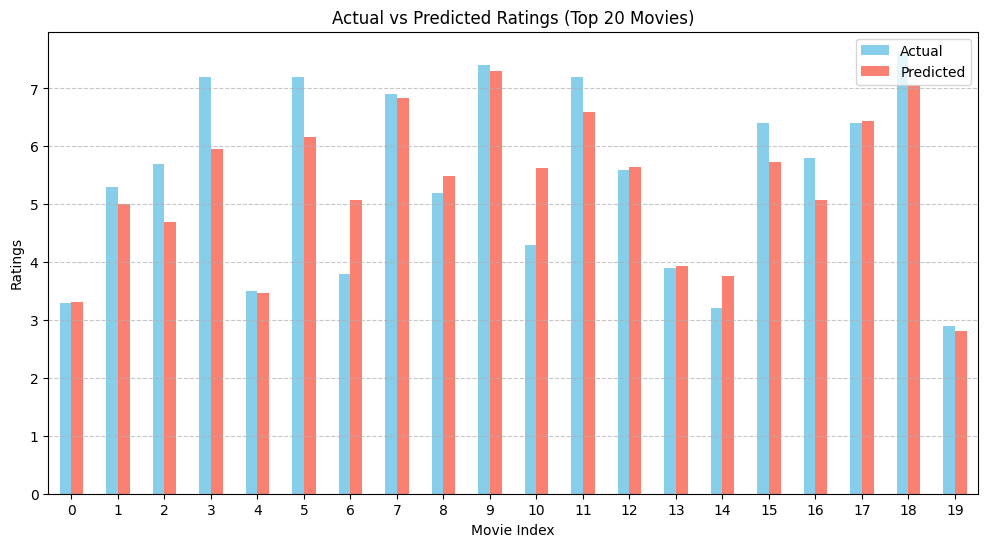

In [175]:
# first we find first 20 movie data
n = 20
df_comparison = pd.DataFrame({'Actual': y_test.values[:n], 'Predicted': y_pred[:n]})

# Plotting
df_comparison.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])

plt.title("Actual vs Predicted Ratings (Top 20 Movies)")
plt.xlabel("Movie Index")
plt.ylabel("Ratings")
plt.xticks(rotation=0) # for making index value straight
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

In [176]:
# Example data: [Year, Votes, Duration, Genre_mean, Director_mean, Actor_mean]
test_movie = [[2023, 5000, 150, 6.5, 7.2, 8.0]]
predicted_rating = model.predict(test_movie)
print(f"this movie predicted rating: {predicted_rating[0]:.1f}")

this movie predicted rating: 8.0


In [177]:
import joblib

# 1. save the model('movie_model.pkl' make file name)
joblib.dump(model, 'movie_model.pkl')
print("Model file is save now: movie_model.pkl")

# 2. load the model and test it (assume you open a new notbook)
loaded_model = joblib.load('movie_model.pkl')

# Test:check it another time it gave same result or not at a time?
test_prediction = loaded_model.predict([[2024, 10000, 140, 7.5, 8.0, 8.5]])
print(f"Loaded Model ki prediction: {test_prediction[0]:.1f}")

Model file is save now: movie_model.pkl
Loaded Model ki prediction: 8.4
